# Road Safety Data for the UK

#### The Data
The [files](https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data) provide detailed road safety data about the circumstances of personal injury road accidents in GB, the types (including Make and Model) of vehicles involved and the consequential casualties. The statistics relate only to personal injury accidents on public roads that are reported to the police, and subsequently recorded, using the STATS19 accident reporting form. The files used here span 2013 to 2017.

# Table of Contents
<a id='Table of Contents'></a>

### <a href='#1. Obtaining and Viewing the Data'>1. Obtaining and Viewing the Data</a>

### <a href='#2. Preprocessing the Data'>2. Preprocessing the Data</a>

* <a href='#2.1. Handling Date and Time'>2.1. Handling Date and Time</a>
* <a href='#2.2. Handling Missing Values'>2.2. Handling Missing Values</a>
* <a href='#2.3. Merging Dataframes'>2.3. Merging Dataframes</a>
* <a href='#2.4. Handling Numerical Data'>2.4. Handling Numerical Data</a>
* <a href='#2.5. Handling Categorical Data'>2.5. Handling Categorical Data</a>

### <a href='#3. Modeling the Data'>3. Modeling the Data</a>

* <a href='#3.1. Train-Test-Split'>3.1. Train-Test-Split</a>
* <a href='#3.2. Handling Imbalanced Classes'>3.2. Handling Imbalanced Classes</a>
* <a href='#3.3. Training and Evaluating Random Forest Classifier with class_weight'>3.3. Training and Evaluating Random Forest Classifier with class_weight</a>
* <a href='#3.4. Training and Evaluating Random Forest Classifier with SMOTE'>3.4. Training and Evaluating Random Forest Classifier with SMOTE</a>

### 1. Obtaining and Viewing the Data
<a id='1. Obtaining and Viewing the Data'></a>

In [1]:
# import the usual suspects ...
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

**Accidents 2013-2017**

*To get some ideas on how to elegantly read in multiple files in pandas, check this [link](https://medium.com/@kadek/elegantly-reading-multiple-csvs-into-pandas-e1a76843b688).*

In [2]:
accidents = pd.concat([pd.read_csv(f, compression='zip', 
                                   low_memory=False) for f in glob.glob('data/*Accidents*.zip')])
print('Records:', accidents.shape[0], '\nColumns:', accidents.shape[1])
accidents.head(3)

Records: 691641 
Columns: 32


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833


In [3]:
#accidents.info()

The combined accidents table that now spans 5 years contains almost 692.000 records and 32 columns, with only very few missing values. If we decided to work with date and/or time, we will need to convert the string values into datetime format. Besides that, almost all data is properly stored as numeric data.

**Casualties 2013-2017**

In [4]:
# renaming the Accident_Index column in one of our tables
#df = pd.read_csv('data/dftRoadSafetyData_Casualties_2013.zip', compression='zip')
#df = df.rename(columns={'Acc_Index': 'Accident_Index'})
#df.to_csv('data/dftRoadSafetyData_Casualties_2013.zip', compression='zip', index=False)

In [5]:
casualties = pd.concat([pd.read_csv(f, compression='zip') for f in glob.glob('data/*Casualties*.zip')], 
                       sort=True)
print('Records:', casualties.shape[0], '\nColumns:', casualties.shape[1])
casualties.head(3)

Records: 916713 
Columns: 16


,Accident_Index,Age_Band_of_Casualty,Age_of_Casualty,Bus_or_Coach_Passenger,Car_Passenger,Casualty_Class,Casualty_Home_Area_Type,Casualty_IMD_Decile,Casualty_Reference,Casualty_Severity,Casualty_Type,Pedestrian_Location,Pedestrian_Movement,Pedestrian_Road_Maintenance_Worker,Sex_of_Casualty,Vehicle_Reference
0,201301BS70003,7,NaN,0,0,1,1,NaN,1,2,1,0,0,0,1,2
1,201301BS70005,6,NaN,0,0,1,1,NaN,1,3,3,0,0,0,2,1
2,201301BS70005,4,NaN,0,0,3,1,NaN,2,3,0,1,1,2,2,1


In [6]:
#casualties.info()

The combined casualties table has roughly 917,000 with 16 columns providing detailed information about the casualties. The data is almost complete, with missing values only in the `age_of_casualty` and `Casualty_IMD_Decile` columns. Apart from the index, all data is stored in a numeric format.

**Vehicles 2013-2017**

In [7]:
# renaming the Accident_Index column in one of our tables
#df = pd.read_csv('data/dftRoadSafetyData_Vehicles_2013.zip', compression='zip')
#df = df.rename(columns={'Acc_Index': 'Accident_Index'})
#df.to_csv('data/dftRoadSafetyData_Vehicles_2013.zip', compression='zip', index=False)

In [8]:
vehicles = pd.concat([pd.read_csv(f, compression='zip') for f in glob.glob('data/*Vehicles*.zip')], 
                     sort=True)
print('Records:', vehicles.shape[0], '\nColumns:', vehicles.shape[1])
vehicles.head(3)

Records: 1270711 
Columns: 23


,1st_Point_of_Impact,Accident_Index,Age_Band_of_Driver,Age_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_(CC),Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,...,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_IMD_Decile,Vehicle_Leaving_Carriageway,Vehicle_Location-Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive?
0,1,201301BS70003,8,NaN,10,1,8,2402,0,0,...,1,0,0,NaN,0,0,6,1,8,1
1,1,201301BS70003,7,NaN,-1,1,8,-1,0,0,...,1,0,0,NaN,0,0,18,2,1,1
2,1,201301BS70005,6,NaN,5,1,4,124,0,0,...,2,0,0,NaN,0,0,18,1,3,1


In [9]:
#vehicles.info()

The vehicles table is the largest of all three and contains roughly 1.270.000 records spanned over 23 columns with detailed information about the vehicle and its driver. We face missing values in the exact same columns as before: `Age_of_Driver` as well as `Vehicle_IMD_Decile`.

Please use at the [data dictionary](https://github.com/BrittaInData/Road-Safety-UK/blob/master/data/Road-Accident-Safety-Data-Guide.xls) to know what kind of information we have.

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
### 2. Preprocessing the Data
<a id='2. Preprocessing the Data'></a>

#### 2.1. Handling Date and Time
<a id='2.1. Handling Date and Time'></a>

We had our `Date` columnwith values not properly stored in the correct format. Let's do this now:

In [10]:
accidents['Date']= pd.to_datetime(accidents['Date'], format="%d/%m/%Y")

In [11]:
# check
accidents.iloc[:, 5:13].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691641 entries, 0 to 138659
Data columns (total 8 columns):
Police_Force                  691641 non-null int64
Accident_Severity             691641 non-null int64
Number_of_Vehicles            691641 non-null int64
Number_of_Casualties          691641 non-null int64
Date                          691641 non-null datetime64[ns]
Day_of_Week                   691641 non-null int64
Time                          691610 non-null object
Local_Authority_(District)    691641 non-null int64
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 47.5+ MB


In [12]:
accidents.iloc[:, 5:13].head(2)

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District)
0,1,3,1,1,2015-01-12,2,18:45,12
1,1,3,1,1,2015-01-12,2,07:50,12


Next, let's define a new column that groups the `Time` the accidents happened into one of five options:
- Morning Rush from 5am to 10am --> value 1
- Office Hours from 10am to 3pm (or: 10:00 - 15:00) --> value 2
- Afternoon Rush from 3pm to 7pm (or: 15:00 - 19:00) --> value 3
- Evening from 7pm to 11pm (or: 19:00 - 23:00) --> value 4
- Night from 11pm to 5am (or: 23:00 - 05:00) --> value 5

In [13]:
# slice first and second string from time column
accidents['Hour'] = accidents['Time'].str[0:2]

# convert new column to numeric datetype
accidents['Hour'] = pd.to_numeric(accidents['Hour'])

# drop null values in our new column
accidents = accidents.dropna(subset=['Hour'])

# cast to integer values
accidents['Hour'] = accidents['Hour'].astype('int')

In [14]:
# define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 15:
        return "2"
    elif hour >= 15 and hour < 19:
        return "3"
    elif hour >= 19 and hour < 23:
        return "4"
    else:
        return "5"

In [15]:
# apply thus function to our temporary hour column
accidents['Daytime'] = accidents['Hour'].apply(when_was_it)
accidents[['Time', 'Hour', 'Daytime']].head()

,Time,Hour,Daytime
0,18:45,18,3
1,07:50,7,1
2,18:08,18,3
3,07:40,7,1
4,07:30,7,1


In [16]:
# drop old time column and temporary hour column
accidents = accidents.drop(columns=['Time', 'Hour'])

#### 2.2. Handling Missing Values
<a id='2.2. Handling Missing Values'></a>

In [17]:
print('Proportion of Missing Values in Accidents Table:', 
      round(accidents.isna().sum().sum()/len(accidents),3), '%')

Proportion of Missing Values in Accidents Table: 0.063 %


In [18]:
accidents = accidents.dropna()

# check if we have no NaN's anymore
accidents.isna().sum().sum()

0

In [19]:
print('Proportion of Missing Values in Casualties Table:', 
      round(casualties.isna().sum().sum()/len(casualties),3), '%')

Proportion of Missing Values in Casualties Table: 0.613 %


In [20]:
print('Proportion of Missing Values in Vehicles Table:', 
      round(vehicles.isna().sum().sum()/len(vehicles),3), '%')

Proportion of Missing Values in Vehicles Table: 0.609 %


The last two dataframes have far too many missing values to even think about dropping them. But the first one only contains 6% missing values and it might be helpful to not mess up later analysis with NaN's. Let's drop them:

In [21]:
accidents.shape

(648155, 32)

In [22]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1270711 entries, 0 to 252499
Data columns (total 23 columns):
1st_Point_of_Impact                 1270711 non-null int64
Accident_Index                      1270711 non-null object
Age_Band_of_Driver                  1270711 non-null int64
Age_of_Driver                       1017798 non-null float64
Age_of_Vehicle                      1270711 non-null int64
Driver_Home_Area_Type               1270711 non-null int64
Driver_IMD_Decile                   1270711 non-null int64
Engine_Capacity_(CC)                1270711 non-null int64
Hit_Object_in_Carriageway           1270711 non-null int64
Hit_Object_off_Carriageway          1270711 non-null int64
Journey_Purpose_of_Driver           1270711 non-null int64
Junction_Location                   1270711 non-null int64
Propulsion_Code                     1270711 non-null int64
Sex_of_Driver                       1270711 non-null int64
Skidding_and_Overturning            1270711 non-null int64


*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 2.3. Merging Dataframes
<a id='2.3. Merging Dataframes'></a>

In [23]:
# combine the accidents with the vehicles table
df = pd.merge(accidents[['Accident_Index', 'Accident_Severity', 'Daytime', 'Speed_limit', 'Urban_or_Rural_Area']], 
              vehicles[['Accident_Index', 'Age_Band_of_Driver', 'Age_of_Vehicle', 
                        'Engine_Capacity_(CC)', 'Propulsion_Code', 'Was_Vehicle_Left_Hand_Drive?']], 
              on='Accident_Index')

df.isna().sum().sum()

0

In [ ]:
#df.info()    

In [ ]:
# cast categorical features - currently stored as string data - to their proper data format
for col in ['Accident_Severity', 'Daytime', 'Speed_limit', 'Urban_or_Rural_Area', 'Age_Band_of_Driver', 
            'Propulsion_Code', 'Was_Vehicle_Left_Hand_Drive?']:
    df[col] = df[col].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1129207 entries, 0 to 1129206
Data columns (total 10 columns):
Accident_Index                  1129207 non-null object
Accident_Severity               1129207 non-null category
Daytime                         1129207 non-null category
Speed_limit                     1129207 non-null category
Urban_or_Rural_Area             1129207 non-null category
Age_Band_of_Driver              1129207 non-null category
Age_of_Vehicle                  1129207 non-null int64
Engine_Capacity_(CC)            1129207 non-null int64
Propulsion_Code                 1129207 non-null category
Was_Vehicle_Left_Hand_Drive?    1129207 non-null category
dtypes: category(7), int64(2), object(1)
memory usage: 42.0+ MB


In [ ]:
# define categorical feature columns
cat_cols = ['Daytime', 'Speed_limit', 'Urban_or_Rural_Area',
            'Age_Band_of_Driver', 'Propulsion_Code', 'Was_Vehicle_Left_Hand_Drive?']

# define numerical feature columns
num_cols = ['Age_of_Vehicle', 'Engine_Capacity_(CC)']

# define target col
target_col = ['Accident_Severity']

cols = cat_cols + num_cols + target_col

# copy dataframe
df_model = df[cols].copy()
df_model.shape

(1129207, 9)

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 2.4. Handling Numerical Data 
<a id='2.4. Handling Numerical Data'></a>

*Detecting Outliers*

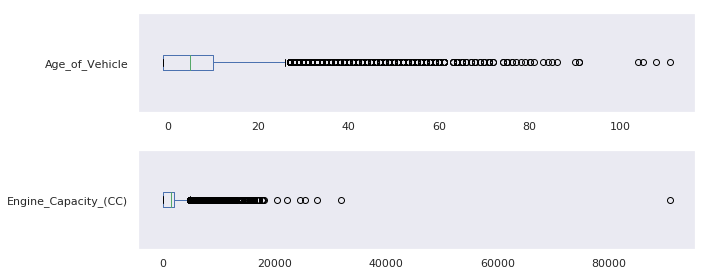

In [ ]:
# plotting boxplots
sns.set(style='darkgrid')
fig, axes = plt.subplots(2,1, figsize=(10,4))

for ax, col in zip(axes, num_cols):
    df_model.boxplot(column=col, grid=False, vert=False, ax=ax)
    plt.tight_layout();

*Handling outliers by dropping them*

In [ ]:
# phrasing conditions
cond_1 = (df_model['Age_of_Vehicle'] < 30) & (df_model['Age_of_Vehicle'] > 0)
cond_2 = (df_model['Engine_Capacity_(CC)'] < 20000) & (df_model['Engine_Capacity_(CC)'] > 0)

# combining all conditions
conditions = cond_1 & cond_2

# keep only records that meet our conditions and don't fall within extreme outliers
df_model = df_model[conditions]

*Feature Scaling*

Tree based models, which we will use here later, are not distance based models and can handle varying ranges of features. Therefore scaling is not required.

In [ ]:
from sklearn import preprocessing

# create scaler
scaler = preprocessing.StandardScaler()

# transform numerical features
#df_model[num_cols] = scaler.fit_transform(df_model[num_cols])
#df_model = pd.merge(df_model[num_cols], df_model[cat_cols], left_index=True, right_index=True)
#round(df_model[num_cols].mean())

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 2.5. Handling Categorical Data
<a id='2.5. Handling Categorical Data'></a>

*Encoding categorical features*

In [ ]:
# create dummy variables from the categorical features
dummies = pd.get_dummies(df_model[cat_cols], drop_first=True)
df_model = pd.concat([df_model[num_cols], df_model[target_col], dummies], axis=1)
df_model.shape

(802939, 39)

In [ ]:
df_model.isna().sum().sum()

0

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
### 3. Modeling the Data
<a id='3. Modeling the Data'></a>

#### 3.1. Train-Test-Split
<a id='3.1. Train-Test-Split'></a>

In [ ]:
# define our features 
features = df_model.drop(['Accident_Severity'], axis=1)

# define our target
target = df_model[['Accident_Severity']]

In [ ]:
from sklearn.model_selection import train_test_split

# split our data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

#### 3.2. Handling Imbalanced Classes
<a id='3.2. Handling Imbalanced Classes'></a>

If we have a target vector with highly imbalanced classes ...

In [ ]:
df_model['Accident_Severity'].value_counts(normalize=True)

3    0.852852
2    0.135063
1    0.012086
Name: Accident_Severity, dtype: float64

... and we can't apply the best strategy and simply can't collect more data, especially from the minority class, we need to find other ways to deal with imbalanced classes.

- A second strategy is to use a model evaluation metric better suited to imbalances classes: confusion matrices, precision, recall, F1 scores, or ROC curves instead of accuracy.
- A third strategy is to use the class weighing parameter included in implementations of some models. This allows us to have the algorithm adjust for imbalanced classes.
- The fourth and fifth strategies are related: downsampling and upsampling. Several of these resampling stratgies are well summarized in this [blog post by Chris Remmel](https://calremmel.github.io/fraud-detection-part-one.html).

Let's focus first on **class_weight parameters**: The Random Forest Classifier we will use now is a popular classification algorithm and includes a `class_weight` parameter.

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 3.3. Training and Evaluating Random Forest Classifier with class_weight
<a id='3.3. Training and Evaluating Random Forest Classifier with class_weight'></a>

In [ ]:
# import classifier
from sklearn.ensemble import RandomForestClassifier

# import metrics
from sklearn.metrics import classification_report, confusion_matrix

# import evaluation tools
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
# instantiate RandomForestClassifier with entropy and class_weight
forest_1 = RandomForestClassifier(random_state=4, criterion='entropy', 
                                        n_jobs=-1, class_weight='balanced')

# train
forest_1.fit(X_train, y_train)

# predict
y_test_preds  = forest_1.predict(X_test)

# evaluate
report = classification_report(y_test, y_test_preds)
print('Classification Report Random Forest - with Entropy and class_weight Parameter: \n', report)

Classification Report Random Forest - with Entropy and class_weight Parameter: 
               precision    recall  f1-score   support

           1       0.02      0.05      0.02      1926
           2       0.16      0.23      0.19     21844
           3       0.86      0.78      0.82    136818

   micro avg       0.69      0.69      0.69    160588
   macro avg       0.35      0.35      0.34    160588
weighted avg       0.75      0.69      0.72    160588



In [ ]:
# cross-validation with F1 score (more appropriate to imbalanced classes)
cross_val_score(forest_1, X_train, y_train, scoring='f1_macro', n_jobs=-1)

array([0.34325286, 0.34299928, 0.3460655 ])

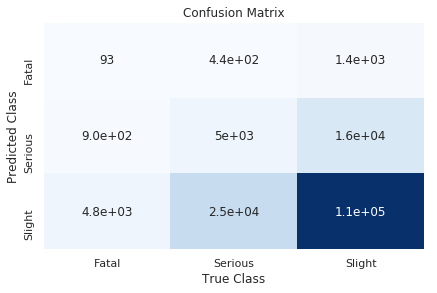

In [ ]:
# create confusion matrix
matrix = confusion_matrix(y_test, y_test_preds)

# create dataframe
class_names = df_model.Accident_Severity.values
dataframe = pd.DataFrame(matrix, index=['Fatal', 'Serious', 'Slight'], 
                         columns=['Fatal', 'Serious', 'Slight'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Class'), plt.ylabel('Predicted Class')
plt.show()

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 3.4. Training and Evaluating Random Forest Classifier with SMOTE
<a id='3.4. Training and Evaluating Random Forest Classifier with SMOTE'></a>

The Random Forest using the `weight_class` parameter did not perform very well on classifying the severity. So let's try one of the resampling strategies to deal properly with our imbalances target classes: **Synthetic Minority Over-sampling Technique (SMOTE)**. Here we're repeatedly sample with replacement from the minority class to make it of equal size as the majority class. To be even more specific: We're creating new synthetic data for the minority class - that is representative but not exact duplicate - using K-Nearest Neighbors.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# view previous class distribution
print('Before Upsampling with SMOTE: ', target['Accident_Severity'].value_counts()) 

# resample data ONLY using training data
X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train) 

# view synthetic sample class distribution
print('After Upsampling with SMOTE: ', pd.Series(y_resampled).value_counts())

Before Upsampling with SMOTE:  3    684788
2    108447
1      9704
Name: Accident_Severity, dtype: int64
After Upsampling with SMOTE:  3    547970
2    547970
1    547970
dtype: int64


In [ ]:
# then perform ususal train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

In [ ]:
# instantiate second RandomForestClassifier with entropy and SMOTE
forest_2 = RandomForestClassifier(random_state=4, criterion='entropy', 
                                        n_jobs=-1, class_weight='balanced')

# train
forest_2.fit(X_train, y_train)

# predict
y_test_preds = forest_2.predict(X_test)

# evaluate
report = classification_report(y_test, y_test_preds)
print('Classification Report Random Forest - with Entropy and SMOTE Upsampling: \n', report)

Classification Report Random Forest - with Entropy and SMOTE Upsampling: 
               precision    recall  f1-score   support

           1       0.89      0.97      0.93    137016
           2       0.72      0.72      0.72    137147
           3       0.77      0.70      0.74    136815

   micro avg       0.80      0.80      0.80    410978
   macro avg       0.79      0.80      0.80    410978
weighted avg       0.79      0.80      0.80    410978



In [ ]:
# cross-validation with F1 score (more appropriate to imbalanced classes)
cross_val_score(forest_2, X_train, y_train, scoring='f1_macro', n_jobs=-1)

In [ ]:
# create confusion matrix
matrix = confusion_matrix(y_test, y_test_preds)

# create dataframe
class_names = df_model.Accident_Severity.values
dataframe = pd.DataFrame(matrix, index=['Fatal', 'Serious', 'Slight'], 
                         columns=['Fatal', 'Serious', 'Slight'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Class'), plt.ylabel('Predicted Class')
plt.show()

In [ ]:
# plot the important features
feat_importances = pd.Series(forest_2.feature_importances_, index=features.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.xlabel('Relative Feature Importance with Random Forest');